In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("OaklandAirportData.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,...,WSFG,WT01,WT02,WT03,WT04,WT05,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",20.0,20.0,NaN,NaN,NaN,NaN,1136.0,0.0,...,20.8,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,0.0,NaN,NaN,NaN,NaN,318.0,0.0,...,21.9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,0.0,NaN,NaN,NaN,NaN,1554.0,0.0,...,13.9,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",20.0,40.0,NaN,NaN,NaN,NaN,1336.0,0.0,...,23.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",40.0,80.0,NaN,NaN,NaN,NaN,1112.0,0.0,...,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,5.59,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.80,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
weather.apply(pd.isnull).sum()/weather.shape[0] #checking for zeros

STATION    0.000000
NAME       0.000000
ACMH       0.717996
ACSH       0.717996
AWND       0.361946
DAPR       0.999439
FMTM       0.846294
MDPR       0.999439
PGTM       0.419638
PRCP       0.019933
SNOW       0.457678
SNWD       0.448905
TAVG       0.857033
TMAX       0.000842
TMIN       0.000983
TSUN       0.919217
WDF1       0.717996
WDF2       0.361875
WDF5       0.368122
WDFG       0.717996
WSF1       0.717996
WSF2       0.361805
WSF5       0.368122
WSFG       0.717996
WT01       0.763546
WT02       0.979295
WT03       0.992911
WT04       0.999719
WT05       0.999509
WT08       0.853313
WT09       0.999930
WT16       0.928902
WT18       0.999860
dtype: float64

In [7]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [8]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.0,0.0,0.0,60.0,35.0
1970-01-02,0.0,0.0,0.0,52.0,39.0
1970-01-03,0.0,0.0,0.0,52.0,35.0
1970-01-04,0.0,0.0,0.0,53.0,36.0
1970-01-05,0.0,0.0,0.0,52.0,35.0
...,...,...,...,...,...
2024-11-30,0.0,NaN,NaN,64.0,42.0
2024-12-01,0.0,NaN,NaN,65.0,52.0
2024-12-02,0.0,NaN,NaN,66.0,45.0


In [9]:
core_weather.apply(pd.isnull).sum() #see how many null values we have

precip         284
snow          6521
snow_depth    6396
temp_max        12
temp_min        14
dtype: int64

In [10]:
#Filling in Missing Values

In [11]:
core_weather["snow"].value_counts()

snow
0.0    7726
1.0       1
Name: count, dtype: int64

In [12]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    7852
Name: count, dtype: int64

In [13]:
del core_weather["snow"]

In [14]:
del core_weather["snow_depth"]

In [15]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [16]:
core_weather.loc["2013-12-15",:]

precip       NaN
temp_max    58.0
temp_min    33.0
Name: 2013-12-15, dtype: float64

In [17]:
core_weather["precip"].value_counts() / core_weather.shape[0]

precip
0.00    0.808815
0.01    0.026670
0.02    0.011159
0.03    0.006597
0.05    0.005825
          ...   
1.92    0.000070
1.77    0.000070
5.01    0.000070
1.19    0.000070
1.28    0.000070
Name: count, Length: 165, dtype: float64

In [18]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [19]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max    12
temp_min    14
dtype: int64

In [20]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [21]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [22]:
core_weather = core_weather.fillna(method="ffill")

C:\Users\karun\AppData\Local\Temp\ipykernel_28404\3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [23]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [24]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [25]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [26]:
core_weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29',
       '2024-11-30', '2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04'],
      dtype='object', name='DATE', length=14248)

In [27]:
core_weather.index = pd.to_datetime(core_weather.index)

In [28]:
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02',
               '2024-12-03', '2024-12-04'],
              dtype='datetime64[ns]', name='DATE', length=14248, freq=None)

In [29]:
core_weather.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=14248)

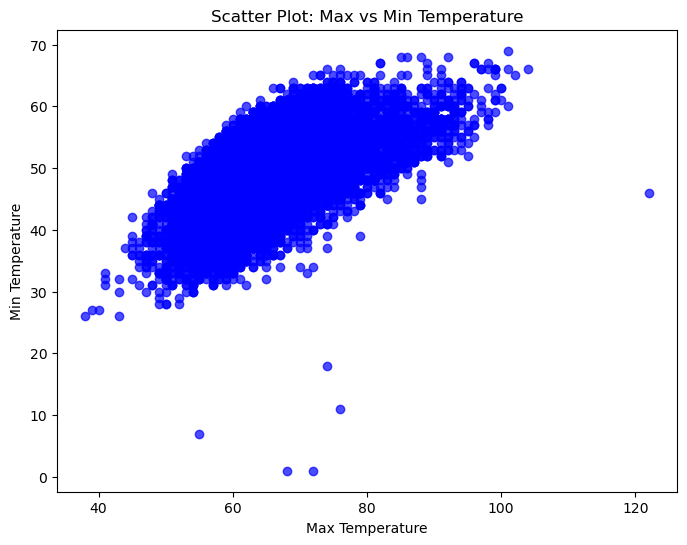

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data from your dataset (assuming 'core_weather' is the DataFrame)
# Use your actual column names here
x = core_weather['temp_max']  # Example: Max temperature
y = core_weather['temp_min']  # Example: Min temperature

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the plot
plt.scatter(x, y, color='blue', alpha=0.7)  # 'blue' for color, alpha for transparency

# Add labels and title
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.title('Scatter Plot: Max vs Min Temperature')

# Show the plot
plt.show()

Text(0, 0.5, 'Temperature')

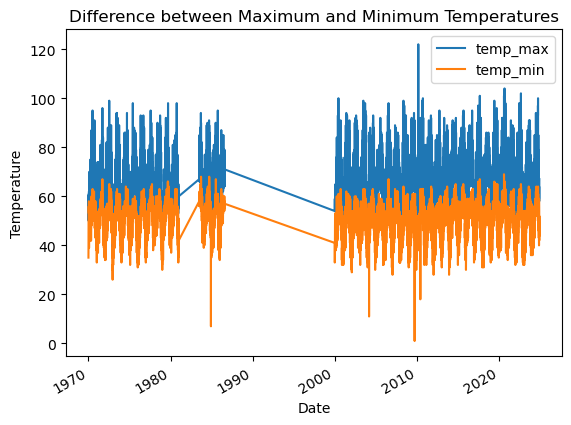

In [34]:
core_weather[["temp_max", "temp_min"]].plot()
plt.title('Difference between Maximum and Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')

In [35]:
#No of observations:
core_weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    339
Name: count, dtype: int64

Text(0, 0.5, 'Precip in Inches')

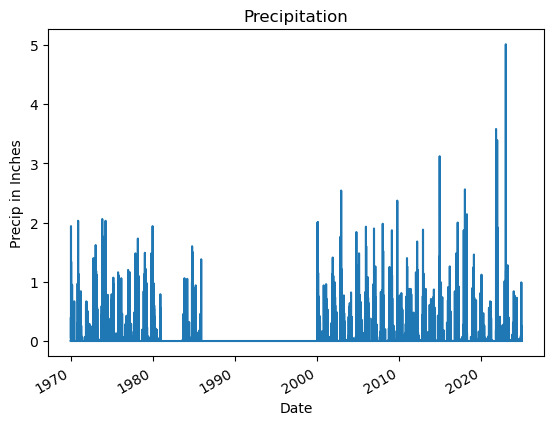

In [36]:
core_weather["precip"].plot()
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('Precip in Inches')

<Axes: xlabel='DATE'>

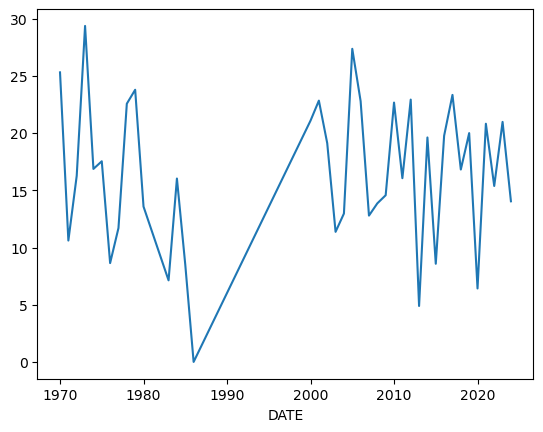

In [37]:
#How much it has rained each year:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [38]:
#Move the data to the left by 1 column
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [39]:
#predicting tomorrow's temp by using data from today
#here one day's target is the next day's max temp
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1970-01-01,0.0,60.0,35.0,52.0
1970-01-02,0.0,52.0,39.0,52.0
1970-01-03,0.0,52.0,35.0,53.0
1970-01-04,0.0,53.0,36.0,52.0
1970-01-05,0.0,52.0,35.0,50.0
...,...,...,...,...
2024-11-30,0.0,64.0,42.0,65.0
2024-12-01,0.0,65.0,52.0,66.0
2024-12-02,0.0,66.0,45.0,66.0


In [40]:
#remove the last row since we don't have data for that

In [41]:
core_weather = core_weather.iloc[:-1,:].copy()

In [42]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1970-01-01,0.0,60.0,35.0,52.0
1970-01-02,0.0,52.0,39.0,52.0
1970-01-03,0.0,52.0,35.0,53.0
1970-01-04,0.0,53.0,36.0,52.0
1970-01-05,0.0,52.0,35.0,50.0
...,...,...,...,...
2024-11-29,0.0,58.0,42.0,64.0
2024-11-30,0.0,64.0,42.0,65.0
2024-12-01,0.0,65.0,52.0,66.0


In [80]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=100)

In [81]:
predictors = ["precip", "temp_max", "temp_min"] # variables to predict target

In [82]:
#Training set
train = core_weather.loc[:"2020-12-31"]
#Test set
test = core_weather.loc["2021-01-01":]

In [83]:
train

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,temperature_class,temperature_class_num
DATE,,,,,,,,,
1970-01-31,0.01,55.0,43.0,59.0,57.000000,1.036364,1.279070,cold,0
1970-02-01,0.01,59.0,48.0,64.0,57.233333,0.970056,1.229167,cold,0
1970-02-02,0.00,64.0,44.0,57.0,57.633333,0.900521,1.454545,cold,0
1970-02-03,0.00,57.0,44.0,60.0,57.766667,1.013450,1.295455,cold,0
1970-02-04,0.00,60.0,48.0,57.0,58.033333,0.967222,1.250000,cold,0
...,...,...,...,...,...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0,63.600000,1.009524,1.431818,cold,0
2020-12-28,0.10,61.0,42.0,60.0,63.500000,1.040984,1.452381,cold,0
2020-12-29,0.00,60.0,39.0,56.0,63.366667,1.056111,1.538462,cold,0


In [84]:
test

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,temperature_class,temperature_class_num
DATE,,,,,,,,,
2021-01-01,0.00,60.0,40.0,57.0,62.833333,1.047222,1.500000,cold,0
2021-01-02,0.14,57.0,51.0,56.0,62.533333,1.097076,1.117647,cold,0
2021-01-03,0.00,56.0,49.0,62.0,62.200000,1.110714,1.142857,cold,0
2021-01-04,0.36,62.0,46.0,59.0,62.133333,1.002151,1.347826,cold,0
2021-01-05,0.00,59.0,42.0,59.0,61.966667,1.050282,1.404762,cold,0
...,...,...,...,...,...,...,...,...,...
2024-11-29,0.00,58.0,42.0,64.0,64.900000,1.118966,1.380952,cold,0
2024-11-30,0.00,64.0,42.0,65.0,64.866667,1.013542,1.523810,cold,0
2024-12-01,0.00,65.0,52.0,66.0,64.833333,0.997436,1.250000,cold,0


In [85]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=100)

In [86]:
predictions = reg.predict(test[predictors])

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

np.float64(21.013694794475384)

In [90]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [91]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.940801
2021-01-02,56.0,59.412380
2021-01-03,62.0,58.601584
2021-01-04,59.0,61.760420
2021-01-05,59.0,59.562849
...,...,...
2024-11-29,64.0,58.839710
2024-11-30,65.0,63.178541
2024-12-01,66.0,65.627609


Text(0.5, 1.0, 'Predictions')

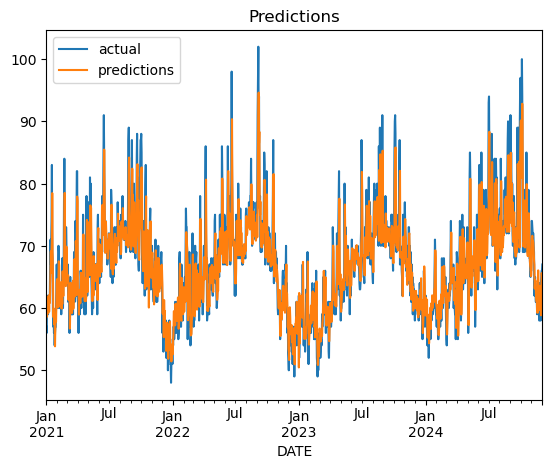

In [92]:
combined.plot()
plt.title('Predictions')

In [93]:
reg.coef_

array([-1.83948807,  0.7231384 ,  0.17259296])

In [94]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [95]:
core_weather = core_weather.iloc[30:,:].copy()

In [96]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [97]:
#slight improvement in error
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

np.float64(20.68441492574137)

<Axes: xlabel='DATE'>

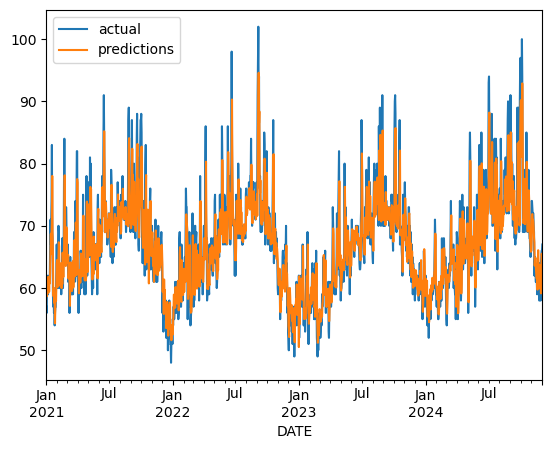

In [98]:
combined.plot()

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [100]:
linreg = LinearRegression()

In [101]:
predictors = ["precip", "temp_max", "temp_min"]  # variables to predict target
train = core_weather.loc[:"2020-12-31"]  # Training set
test = core_weather.loc["2021-01-01":]  # Test set

In [102]:
linreg.fit(train[predictors], train["target"])
predictions = linreg.predict(test[predictors])

In [103]:
mse1 = mean_squared_error(test["target"], predictions)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 21.038988465962472


In [104]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

<Axes: xlabel='DATE'>

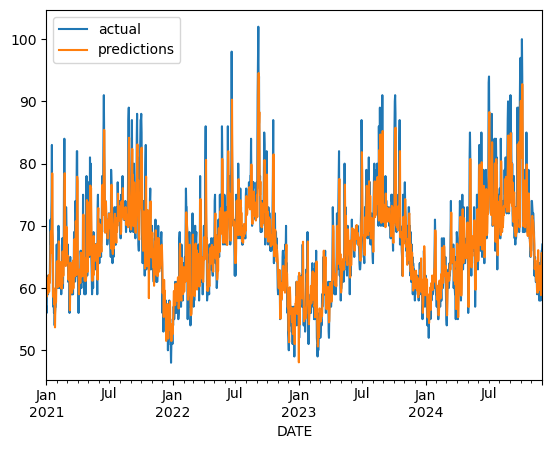

In [105]:
combined.plot()

In [106]:
linreg.coef_

array([-2.32905271,  0.71966872,  0.17511673])

In [107]:
def create_predictions_lin(predictors, core_weather, linreg):
    train = core_weather.loc[:"2020-12-31"]  # Training set
    test = core_weather.loc["2021-01-01":]  # Test set

    linreg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [108]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

linerror, combined = create_predictions(predictors, core_weather, linreg)
linerror

np.float64(20.36143441592672)

Accuracy: 1.0


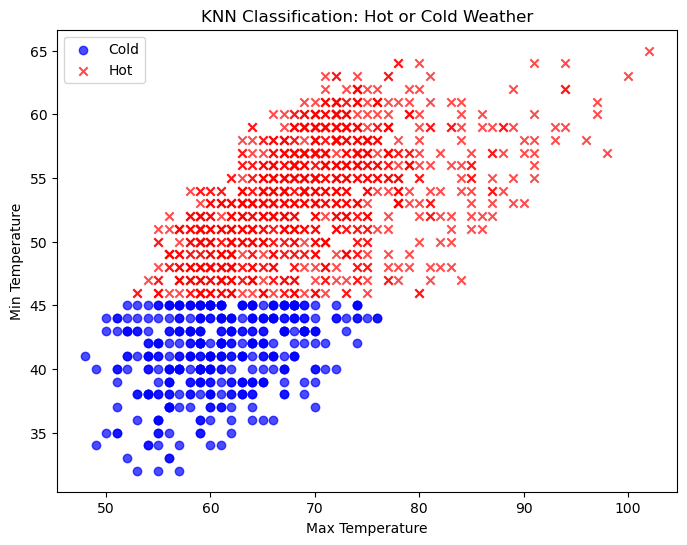

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the 'hot' or 'cold' classification based on temperature
core_weather['temperature_class'] = np.where(core_weather['temp_min'] > 45, 'hot', 'cold')

# Map 'hot' to 1 and 'cold' to 0
core_weather['temperature_class_num'] = core_weather['temperature_class'].map({'hot': 1, 'cold': 0})

# Define predictors (temp_max, temp_min) and target (temperature_class_num)
predictors = ["temp_max", "temp_min"]
target = "temperature_class_num"

# Train-test split
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

# Feature scaling (important for KNN)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_scaled, train[target])

# Make predictions on the test set
test_predictions = knn.predict(test_scaled)

# Accuracy
accuracy = accuracy_score(test[target], test_predictions)
print(f"Accuracy: {accuracy}")

# Visualizing the results with different markers 
plt.figure(figsize=(8, 6))

# Plot 
cold_points = test[test_predictions == 0]
hot_points = test[test_predictions == 1]

plt.scatter(cold_points['temp_max'], cold_points['temp_min'], c='blue', marker='o', label='Cold', alpha=0.7)
plt.scatter(hot_points['temp_max'], hot_points['temp_min'], c='red', marker='x', label='Hot', alpha=0.7)

plt.title("KNN Classification: Hot or Cold Weather")
plt.xlabel("Max Temperature")
plt.ylabel("Min Temperature")
plt.legend()

# Show the plot
plt.show()